In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np

In [2]:
x_train = np.load("../data/x_train.npy").astype("float32") #(n,img_w,img_h,rgb)
y_train = np.load("../data/y_train.npy")


x_test = np.load("../data/x_test.npy").astype("float32")
y_test = np.load("../data/y_test.npy")


In [3]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])   
x_train = torch.Tensor(np.array([transform(img).numpy() for img in x_train]))
num_classes = 10
y_train = torch.Tensor(y_train).type(torch.int64)[:,0]
#y_train = torch.zeros(y_train.shape[0],num_classes).scatter_(1,y_train,1)

In [4]:
x_train.shape,y_train.shape

(torch.Size([50000, 3, 32, 32]), torch.Size([50000]))

In [5]:
x_train.dtype,y_train.dtype

(torch.float32, torch.int64)

In [6]:
x_test = torch.Tensor(np.array([transform(img).numpy() for img in x_test]))
y_test = torch.Tensor(y_test).type(torch.int64)[:,0]
#y_test = torch.zeros(y_test.shape[0],num_classes).scatter_(1,y_test,1)

In [7]:
x_test.shape,y_test.shape

(torch.Size([10000, 3, 32, 32]), torch.Size([10000]))

In [8]:
import torch.utils.data as Data

In [9]:
train_dataset = Data.TensorDataset(x_train,y_train)
trainloader = torch.utils.data.DataLoader(train_dataset, 
                                          batch_size=64,
                                          shuffle=True, 
                                          num_workers=2)


# 创建测试集
test_dataset = Data.TensorDataset(x_test,y_test)
testloader = torch.utils.data.DataLoader(test_dataset, 
                                         batch_size=64,
                                         shuffle=False, 
                                         num_workers=2)

In [10]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [11]:
net = Net()

In [12]:
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")

In [13]:
print(type(device))

<class 'torch.device'>


In [14]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [15]:
import torch.optim as optim

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [17]:
import time

In [18]:
loss_list = []
for epoch in range(50):  # loop over the dataset multiple times              #整个数据训练两轮

    #所有数据开始训练  
    running_loss = 0.0
    loss_out = 0.0
    start = time.time()
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
    
        inputs, labels = data[0].to(device), data[1].to(device)
       
        optimizer.zero_grad()                    #将梯度初始化为零

        # forward + backward + optimize
        outputs = net(inputs)
        #print(outputs.dtype)
        
        loss = criterion(outputs, labels)        # 计算loss
        
        loss.backward()                          # loss 求导
        optimizer.step()                         # 更新参数


        #输出损失函数 两千轮显示一次
        # print statistics
        running_loss += loss.item()              #获取tensor的数值
        if i % 20 == 19:    # print every 2000 mini-batches
            print('\r[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 20),end='')
            loss_out = running_loss
            running_loss = 0.0                   # 每2000次迭代，输出loss的平均值
    end = time.time()
    print("\r",end='')
    loss_print = loss_out / 20
    loss_list.append(loss_print)
    print('[epoch :%d] loss: %.3f       [time :%.3f s]  ' %
                  (epoch + 1, loss_print,end-start))

print('Finished Training')

[epoch :1] loss: 1.879       [time :5.032 s]  
[epoch :2] loss: 1.696       [time :4.908 s]  
[epoch :3] loss: 1.600       [time :4.808 s]  
[epoch :4] loss: 1.625       [time :4.817 s]  
[epoch :5] loss: 1.568       [time :5.187 s]  
[epoch :6] loss: 1.457       [time :4.997 s]  
[epoch :7] loss: 1.406       [time :5.181 s]  
[epoch :8] loss: 1.388       [time :4.968 s]  
[epoch :9] loss: 1.382       [time :4.830 s]  
[epoch :10] loss: 1.324       [time :4.939 s]  
[epoch :11] loss: 1.213       [time :4.856 s]  
[epoch :12] loss: 1.239       [time :4.909 s]  
[epoch :13] loss: 1.179       [time :4.831 s]  
[epoch :14] loss: 1.231       [time :4.813 s]  
[epoch :15] loss: 1.184       [time :4.821 s]  
[epoch :16] loss: 1.243       [time :4.893 s]  
[epoch :17] loss: 1.163       [time :4.821 s]  
[epoch :18] loss: 1.130       [time :4.960 s]  
[epoch :19] loss: 1.157       [time :4.845 s]  
[epoch :20] loss: 1.110       [time :4.895 s]  
[epoch :21] loss: 1.089       [time :4.853 s]  
[

In [19]:
import matplotlib.pyplot as plt

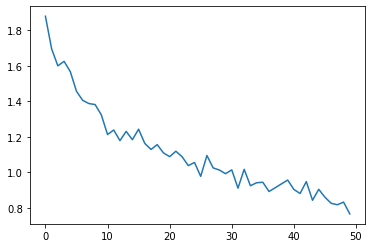

In [20]:
plt.plot(range(len(loss_list)),loss_list)

In [21]:
net

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [22]:
torch.save(net,"../model/model_1.pt")